In [ ]:
import numpy as np
import pandas as pd # pd 라이브러리

# Machine Learning - Pandas Review (Cont.) and Linear Regression (Normal Equation)

## 1. Creating a DataFrame with Pandas
- Use pd.DataFrame() to create a DataFrame from scratch
- Use pd.Series() to create a Series object and add it to a DataFrame
- Use pd.Series() to create a new entry ('Hong', 20, 158) and add it to a DataFrame
- Demonstrate how to inspect the created DataFrame using head(), tail(), and describe() functions

In [ ]:
# create a table
df = pd.DataFrame({
    'name' : ['Kim', 'Lee', 'Park'],
    'age' : [15, 17, 18]
})

In [ ]:
df

,name,age
0,Kim,15
1,Lee,17
2,Park,18


In [ ]:
# new column
s = pd.Series([163, 165, 168])
df['height'] = s

In [ ]:
df

,name,age,height
0,Kim,15,163.0
1,Lee,17,165.0
2,Park,18,168.0
3,Hong,20,NaN


In [ ]:
new_entry = pd.Series(['Hong', 20, 158], index=['name', 'age', 'height'])
df = df.append(new_entry, ignore_index=True)
# df = df.append(new_entry, ignore_index=False)

<ipython-input-14-1b6df848cf27>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_entry, ignore_index=True)


In [ ]:
df

,name,age,height
0,Kim,15,163.0
1,Lee,17,165.0
2,Park,18,168.0
3,Hong,20,NaN
4,Hong,20,158.0


In [ ]:
df.head(2) # 2개 뽑기 (데이터 확인용)

,name,age,height
0,Kim,15,163.0
1,Lee,17,165.0


In [ ]:
df.tail(1) # 마지막 데이터 1개 불러오기

,name,age,height
3,Hong,20,158


In [ ]:
df.describe() # 총 개수 / 평균 / 표준편차 / 최소값 / 최대값 / ...

,age,height
count,5.00000,4.000000
mean,18.00000,163.500000
std,2.12132,4.203173
min,15.00000,158.000000
25%,17.00000,161.750000
50%,18.00000,164.000000
75%,20.00000,165.750000
max,20.00000,168.000000


# 2. Loading Public Data
- load public dataset using read_csv method.
- give headings to the dataset: ["sepal length", "sepal width", "petal length", "petal width", "class"]
- inspect dataset using head(), tail(), describe()

In [ ]:
# load famous iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df3 = pd.read_csv(url, header=None)

In [ ]:
df3

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# add headings
df3.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]

In [ ]:
# inspect dataset
df3.head(3)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
# inspect dataset
df3.tail(2)

,sepal length,sepal width,petal length,petal width,class
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# inspect dataset
df3.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3. Indexing and Slicing using Column Names
- select a single column using its name
- select multiple columns using a list of column names
- select rows using a label-based index: loc
- select rows using an index-based index: iloc


In [ ]:
# load iris data
df3.head(3)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
# select a single column
sepal_length = df3["sepal length"]
sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length, Length: 150, dtype: float64

In [ ]:
# select multiple columns
sepal_petal_length = df3[['sepal length', 'petal length']]
sepal_petal_length

,sepal length,petal length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [ ]:
# select only virginica using loc
virginica_entries = df3.loc[df3["class"] == "Iris-virginica"]

In [ ]:
virginica_entries.head(5)

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [ ]:
# Slicing: select some part of the dataframe: using iloc()
sliced_data = df3.iloc[5: 10]
sliced_data

,sepal length,sepal width,petal length,petal width,class
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# or select the exact entry
df3.iloc[1, 1]

3.0

# 4. Identifying Outliers using Boxplots and Scatterplots
1. Load the Wine Quality dataset into a Pandas DataFrame using pd.read_csv(). The URL for the dataset is: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
2. Create a boxplot of the target variable "quality" using plt.boxplot().
3. Create q_high and q_low where q_high and q_low is the quantile for 0.95 and 0.05, respectively.
4. Remove outliers and create box plot with the new dataframe

In [ ]:
import matplotlib.pyplot as plt

# 와인
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df6 = pd.read_csv(url, sep=';')

In [ ]:
df6

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df6.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5ce2545db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5ce25462f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5ce2545b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5ce2546830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5ce2546ad0>],
 'means': []}

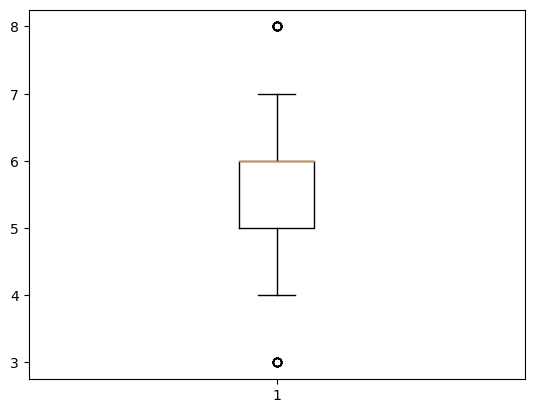

In [ ]:
plt.boxplot(df6["quality"])

In [ ]:
# Create q_high and q_low where q_high and q_low is the quantile for 0.95 and 0.05, respectively.
q_low = df6["quality"].quantile(0.05) # quantile(0.05) 상위 5% 뽑기
q_high = df6["quality"].quantile(0.95)

In [ ]:
q_low

5.0

In [ ]:
q_high

7.0

In [ ]:
# Remove outliers and create box plot with the new dataframe
df_new = df6[(df6["quality"] > q_low) & (df6["quality"] < q_high)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6
24,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5ce25c4ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5ce25c51e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5ce25c4a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5ce25c5720>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5ce25c59c0>],
 'means': []}

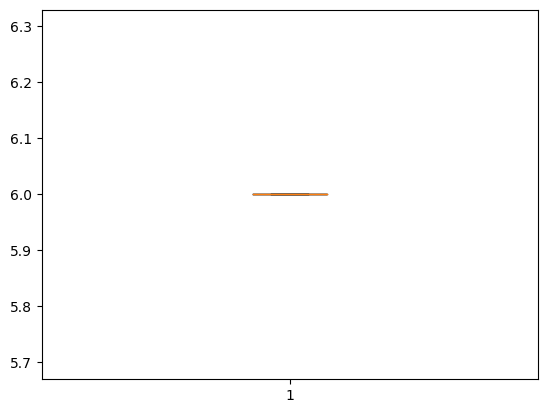

In [ ]:

# box plot
plt.boxplot(df_new["quality"])

# 5. Linear Regression (Normal Equation)
- Build a linear regression model where the features are "fixed acidity", "volatile acidity", and "chlorides".
- Our prediction variable is "quality"


In [ ]:
# show data headings
df6.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# A: matrix with three features
A = df6[["fixed acidity", "volatile acidity", "chlorides"]]

In [ ]:
A

,fixed acidity,volatile acidity,chlorides
0,7.4,0.700,0.076
1,7.8,0.880,0.098
2,7.8,0.760,0.092
3,11.2,0.280,0.075
4,7.4,0.700,0.076
...,...,...,...
1594,6.2,0.600,0.090
1595,5.9,0.550,0.062
1596,6.3,0.510,0.076
1597,5.9,0.645,0.075


In [ ]:
# augment matrix with a column in the leftmost corner with 1
A.insert(0, 'intercept', 1)

In [ ]:
A

,intercept,fixed acidity,volatile acidity,chlorides
0,1,7.4,0.700,0.076
1,1,7.8,0.880,0.098
2,1,7.8,0.760,0.092
3,1,11.2,0.280,0.075
4,1,7.4,0.700,0.076
...,...,...,...,...
1594,1,6.2,0.600,0.090
1595,1,5.9,0.550,0.062
1596,1,6.3,0.510,0.076
1597,1,5.9,0.645,0.075


In [ ]:
# Convert A into numpy matrix
A = A.to_numpy()

In [ ]:
# b: prediction variable - quality
b = df6["quality"].to_numpy()

In [ ]:
b

array([5, 5, 5, ..., 6, 5, 6])

In [ ]:
# x_hat = (A.T A)^-1 A.T b
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b

Suppose we want to test a sample with

- "fixed acidity" = 1
- "volatile acidity" = 0.78
- "chlorides" = 0.093

What is the estimate of "quality" for this sample?

In [ ]:
# test sample
test_sample = np.array([1, 7.8, 0.77, 0.093]).reshape(4, 1)
# estimate
x_hat.T @ test_sample

array([5.20786316])